<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/rpsmo_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/0luqxkj0axpgsxo/bottles.zip

--2024-04-03 18:37:15--  https://www.dropbox.com/s/0luqxkj0axpgsxo/bottles.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0luqxkj0axpgsxo/bottles.zip [following]
--2024-04-03 18:37:15--  https://www.dropbox.com/s/raw/0luqxkj0axpgsxo/bottles.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4db757a0b45e05db8ae2022495.dl.dropboxusercontent.com/cd/0/inline/CQVJvyCLtlWqc0CwcTXr7obdpWtUWx2U8EuJInf7-qpAha8hdCjRR2QR8oQuSRaIZNd85WOHca5FuTnNUofY8V4dKf2hVNeidflTEXWWhni31styI8poO9u5J4vJarQtYlFye4DdXGoo_AbLfa7mglVT/file# [following]
--2024-04-03 18:37:15--  https://uc4db757a0b45e05db8ae2022495.dl.dropboxusercontent.com/cd/0/inline/CQVJvyCLtlWqc0CwcTXr7obdpWtUWx2U8EuJInf7-qpAha8hdCjRR2QR8oQuSRaIZNd85WOHca5FuTnNUofY8V4dKf2hVNeidflTEXWWh

In [3]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/bottles.zip','r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/rpsmo')

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout , BatchNormalization
import pandas as pd

In [42]:
DATADIR = '/content/drive/MyDrive/rpsmo/'
IMG_SIZE = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=5)

val_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=5)

class_names = train_ds.class_names

Found 8183 files belonging to 3 classes.
Using 6547 files for training.
Found 8183 files belonging to 3 classes.
Using 1636 files for validation.


In [43]:
class_names

['cans', 'glass_bottles', 'plastic_bottles']

In [55]:
test_ds = val_ds.take(1001)
val_ds = val_ds.skip(1001)

In [49]:
classifier = Sequential()
classifier.add(Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1))),
classifier.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', strides=1))
classifier.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
classifier.add(Conv2D(filters=32, kernel_size=3,activation='relu', padding='same', strides=1))
classifier.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=3, activation='softmax'))
# classifier.add(Dense(units=3, activation='sigmoid'))
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 8192)             

In [50]:
callbacks = [EarlyStopping(monitor='val_loss',min_delta=0.01,
                           patience=3),
             ModelCheckpoint('/content/drive/MyDrive/rpsmo_lab1_model/model_checkpoint_3.keras',
                             save_best_only=True)]

In [51]:
history = classifier.fit(train_ds, epochs=50,
                        validation_data = val_ds,
                        callbacks = callbacks)

Epoch 1/50
1310/1310 [==============================] - 103s 78ms/step - loss: 0.2615 - accuracy: 0.9218 - val_loss: 0.1966 - val_accuracy: 0.9199
Epoch 2/50
1310/1310 [==============================] - 105s 80ms/step - loss: 0.2000 - accuracy: 0.9223 - val_loss: 0.1596 - val_accuracy: 0.9218
Epoch 3/50
1310/1310 [==============================] - 114s 87ms/step - loss: 0.1324 - accuracy: 0.9430 - val_loss: 0.0936 - val_accuracy: 0.9627
Epoch 4/50
1310/1310 [==============================] - 99s 76ms/step - loss: 0.0900 - accuracy: 0.9641 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 5/50
1310/1310 [==============================] - 83s 63ms/step - loss: 0.0723 - accuracy: 0.9716 - val_loss: 0.0916 - val_accuracy: 0.9743
Epoch 6/50
1310/1310 [==============================] - 86s 66ms/step - loss: 0.0431 - accuracy: 0.9838 - val_loss: 0.0661 - val_accuracy: 0.9847
Epoch 7/50
1310/1310 [==============================] - 83s 64ms/step - loss: 0.0356 - accuracy: 0.9881 - val_loss: 0.069

In [53]:
classifier.save('/content/drive/MyDrive/rpsmo_lab1_model/model_can_plastic_glass_bottle_classification.keras')

<Axes: >

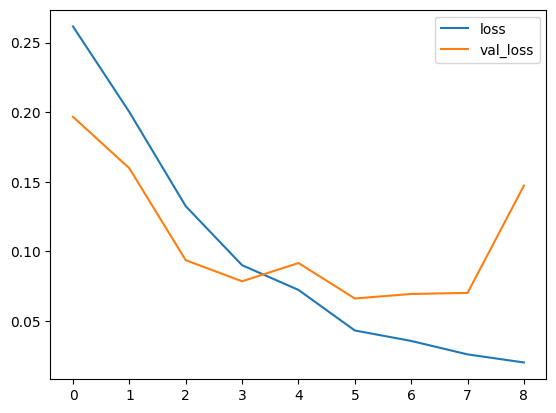

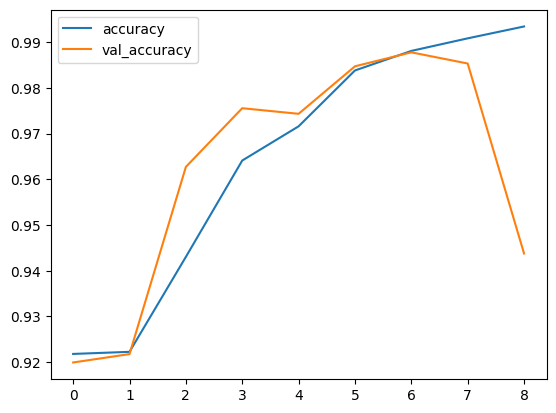

In [54]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()

In [61]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/rpsmo_lab1_model/model_can_plastic_glass_bottle_classification.keras')
result_test = model.evaluate(test_ds)

328/328 [==============================] - 11s 32ms/step - loss: 0.0444 - accuracy: 0.9963


1/1 [==============================] - 0s 31ms/step
Предмет на изображении : plastic_bottles 


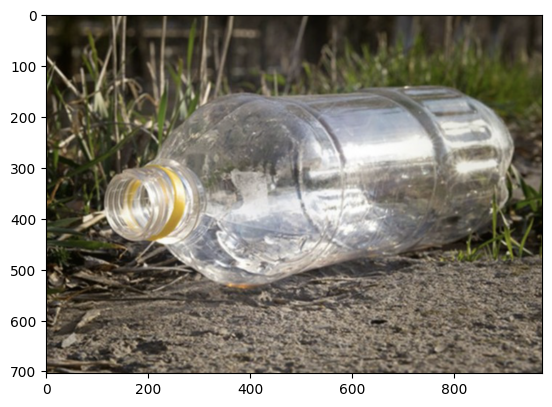

In [64]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
# img_path = '/content/drive/MyDrive/rpsmo_lab1_model/test_img/dtjmb.jpg' # glass_bottle
# img_path = '/content/drive/MyDrive/rpsmo_lab1_model/test_img/tpwye.jpg' # can
# img_path = '/content/drive/MyDrive/rpsmo_lab1_model/test_img/zyunj.jpg' # plastic
img_path = '/content/drive/MyDrive/rpsmo_lab1_model/test_img/pb.png' # plastic
image = keras.utils.load_img(img_path,target_size=(IMG_SIZE, IMG_SIZE),color_mode='grayscale')
input_arr = keras.utils.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])

pil_image = Image.open(img_path)
imshow(np.asarray(pil_image))
print(
    "Предмет на изображении : {} "
    .format(class_names[np.argmax(score)])
)